In [1]:
#mentioning all the libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import warnings

## GATHER

In [2]:
#reading and loading a csv file 
twitter=pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
#loading a tsv file 
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
#creating API object. I have removed original values of consumer_key, consumer_secret,OAUTH_TOKEN,OAUTH_TOKEN_SECRET
consumer_key = 'my consumer key'
consumer_secret = 'my consumer secret'
OAUTH_TOKEN = 'my oauth token'
OAUTH_TOKEN_SECRET = 'my token secret'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
#writing json data to tweet_json.txt file
with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in twitter['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 722
Rate limit reached. Sleeping for: 724


In [6]:
#append each data to tweet_list line by line
tweet_list = []

file = open('tweet_json.txt', "r")

for line in file:
    try:
        data = json.loads(line)
        tweet_list.append(data)
    except:
        continue
        
file.close()

In [7]:
#creating dataframe for tweet_data
tweet_data = pd.DataFrame()
tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))



** We have three dataframes named as :twitter , tweet_data , image **

##  ASSESS 

In [8]:
# first ten entries of twitter dataframe
twitter.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# first 10 entries of image dataframe
image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
# first 10 entries of tweet_data dataframe
tweet_data.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8580,38778
1,892177421306343426,6304,33207
2,891815181378084864,4186,25009
3,891689557279858688,8706,42146
4,891327558926688256,9468,40312
5,891087950875897856,3136,20207
6,890971913173991426,2087,11847
7,890729181411237888,19021,65476
8,890609185150312448,4292,27769
9,890240255349198849,7464,31923


In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23752 entries, 0 to 23751
Data columns (total 3 columns):
id                23752 non-null int64
retweet_count     23752 non-null int64
favorite_count    23752 non-null int64
dtypes: int64(3)
memory usage: 556.8 KB


In [14]:
# checking for null values in twitter dataframe for each column
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# checking for null values in image dataframe for each column
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
#checking for null values in tweet_data dataframe for each column
tweet_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [17]:
# inspecting the name column of twitter dataframe
twitter['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
Bailey         7
Toby           7
an             7
Koda           6
Oscar          6
Dave           6
Milo           6
Scout          6
Stanley        6
Leo            6
Jax            6
Bella          6
Rusty          6
Jack           6
Alfie          5
            ... 
Moofasa        1
Glacier        1
Socks          1
Biden          1
Snickers       1
Chaz           1
Pumpkin        1
Eevee          1
Thor           1
Crumpet        1
Kane           1
Eazy           1
Julius         1
Charleson      1
Brownie        1
Rambo          1
Batdog         1
Tedrick        1
Rueben         1
Kulet          1
Nigel          1
Hanz           1
Bones          1
Diogi          1
Blakely        1
Sephie         1
Tug            1
Willow        

In [18]:
#checking those texts which contain any decimal rating as rating_numerator values can be wrong for those particular rows
twitter[twitter['text'].str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [19]:
#Checking if any dog has 0 as its rating_denominator value as that value is wrong
twitter[twitter['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
#checking for those rows in which rating denominator is not having value 10
twitter[twitter['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [21]:
image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [22]:
#checking for duplicate values in tweet_data dataframe
tweet_data.duplicated().sum()

14003

In [23]:
#checking for duplicate values in twitter dataframe
twitter.duplicated().sum()

0

In [24]:
#checking for duplicate values in image dataframe
image.duplicated().sum()

0

** QUALITY ISSUES WITH DATAFRAMES **

 -> data type conflicts (time_stamp, in_reply_to_user_id, in_reply_to_status_id,tweet_id , etc...)
 
 
 
 
 
 



 
 

-> duplicacy of records( In tweet_data dataframe)

-> dataframe consists of retweets

-> Incorrect dog names in twitter dataframe

-> tweets with no images are present

-> record containing wrong value of rating_denominator as 0

-> some columns such as retweeted_status_id and retweeted_status_user_id are not required 

-> the rating_numerator value of records having decimal rating in their text is not written properly


** TIDINESS ISSUES **

-> The distinct dog type columns ( can be resolved by combining dog type columns into one column)

-> merging all the three dataframes together to get a new dataframe 

# CLEAN

In [25]:
# creating copies of dataframes for cleaning purpose
twitter_clean=twitter.copy()
image_clean=image.copy()
tweet_data_clean=tweet_data.copy()



** DEFINE **

Removing retweets from twitter_clean dataframe

** CODE **

In [26]:
# if retweet status id is null then there is no retweet
twitter_clean=twitter_clean[twitter_clean['retweeted_status_id'].isnull()]

In [27]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


** TEST **

In [28]:
# Through info we can observe that there is no non null value present for retweeted_status_id
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

**  DEFINE  **

removing columns related to retweets from twitter_clean dataframe

** CODE **

In [29]:
columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_clean.drop(columns,inplace=True,axis=1)

** TEST **

In [30]:
# to check if the columns related to retweets are deleted
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


** DEFINE **

Removing the invalid names of dogs (We observed while assessing that the dog names having all lowercase letters are wrong names)

** CODE **

In [31]:
# replacing invalid names with None 
for name in twitter_clean['name']:
    if name.islower()==True:
        twitter_clean.replace(name,'None',inplace=True)

** TEST **

In [32]:
# to check whether invalid dog names are removed and replaced with None 
twitter_clean['name'].value_counts()

None            784
Charlie          11
Lucy             11
Oliver           10
Cooper           10
Penny             9
Tucker            9
Winston           8
Sadie             8
Lola              8
Daisy             7
Toby              7
Bo                6
Jax               6
Bailey            6
Bella             6
Stanley           6
Oscar             6
Koda              6
Louis             5
Rusty             5
Scout             5
Buddy             5
Bentley           5
Dave              5
Milo              5
Leo               5
Chester           5
Alfie             4
Brody             4
               ... 
Opie              1
Traviss           1
Kota              1
Rupert            1
Shooter           1
Bronte            1
Eve               1
Blanket           1
Hercules          1
William           1
Apollo            1
Chompsky          1
Terrance          1
Ziva              1
Bobby             1
Rufio             1
Sandra            1
Cleopatricia      1
Hero              1


** DEFINE **

to replace invalid ratings with the decimal rating present in the text (if present)

** CODE **

In [33]:
#column width is adjusted to make the full text visible
pd.set_option('display.max_colwidth', -1)
twitter_clean[twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [34]:
# replacing the invalid ratings with the correct decimal ratings
twitter_clean.loc[twitter_clean['tweet_id']==883482846933004288,"rating_numerator"]=13.5
twitter_clean.loc[twitter_clean['tweet_id']==786709082849828864,"rating_numerator"]=9.75
twitter_clean.loc[twitter_clean['tweet_id']==778027034220126208,"rating_numerator"]=11.27
twitter_clean.loc[twitter_clean['tweet_id']==681340665377193984,"rating_numerator"]=9.5
twitter_clean.loc[twitter_clean['tweet_id']==680494726643068929,"rating_numerator"]=11.26


** TEST **

In [35]:
# checking whether updation of rating_denominator and rating_numerator is done 
twitter_clean[twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,None,None,None,None


** DEFINE **

correcting the rating_numerator and rating_denominator values where the value of rating_denominator is 0

** CODE **

In [36]:
#checking for the rows having rating_denominator = 0
twitter_clean[twitter_clean['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0,None,None,None,None,None


In [37]:
#inspecting the text to check whether rating is available or not
twitter_clean.loc[twitter_clean['rating_denominator']==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [38]:
# changing the invalid rating values to valid values
twitter_clean.loc[twitter_clean['tweet_id']==835246439529840640,"rating_numerator"]=13
twitter_clean.loc[twitter_clean['tweet_id']==835246439529840640,"rating_denominator"]=10


** TEST**

In [39]:
# checking whether changes are performed for the particular tweet_id 
twitter_clean.loc[twitter_clean['tweet_id']==835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,13.0,10,None,None,None,None,None


** DEFINE **

Merging the columns of dog type into one column

** CODE **

In [40]:
#defining a new column dog_type and removing the columns which are not required
twitter_clean['dog_type']=twitter_clean.text.str.extract('(puppo|pupper|floofer|doggo)',expand=True)
columns=['doggo','floofer','pupper','puppo']
twitter_clean=twitter_clean.drop(columns,axis=1)

** TEST **

In [41]:
#to check whether the columns are merged into one column dog_type
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_type                 364 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 203.9+ KB


** DEFINE **

changing data types of columns of twitter_clean dataframe

**CODE **

In [42]:
#changing data type of rating_numerator and rating_denominator to float
twitter_clean['rating_numerator']=twitter_clean.rating_numerator.astype('float')
twitter_clean['rating_denominator']=twitter_clean.rating_denominator.astype('float')

In [43]:
#changing data type of dog_type to category data type
#changing data type of timestamp to datetime data type
twitter_clean['dog_type']=twitter_clean['dog_type'].astype('category')
twitter_clean['timestamp']=pd.to_datetime(twitter_clean['timestamp'])


In [44]:
#changing datatype of mentioned columns to string
twitter_clean['in_reply_to_status_id'] = twitter_clean['in_reply_to_status_id'].astype('str')
twitter_clean['in_reply_to_user_id'] = twitter_clean['in_reply_to_user_id'].astype('str')
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype('str')



**TEST**

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
dog_type                 364 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(7)
memory usage: 189.2+ KB


** DEFINE **

changing the rating_numerator and rating_denominator where rating denominator is not equal to 10

**CODE**

In [46]:
# checking for those records where rating_denominator is not equal to 10
twitter_clean[twitter_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
342,832088576586297345,8.3208754756e+17,30582082.0,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11.0,15.0,None,NaN
433,820690176645140481,nan,nan,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,NaN
516,810984652412424192,nan,nan,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,NaN
902,758467244762497024,nan,nan,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,NaN
1068,740373189193256964,nan,nan,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,None,NaN
1120,731156023742988288,nan,nan,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,None,doggo
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,NaN
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN
1228,713900603437621249,nan,nan,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,pupper
1254,710658690886586372,nan,nan,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,pupper


In [47]:
#changing incorrect values by inspecting the text in which the correct rating is available
twitter_clean.loc[twitter_clean['tweet_id']=='722974582966214656',"rating_numerator"]=13
twitter_clean.loc[twitter_clean['tweet_id']=='722974582966214656',"rating_denominator"]=10


In [48]:
#one more record found whose rating was available in text
twitter_clean.loc[twitter_clean['tweet_id']=='716439118184652801',"rating_numerator"]=11
twitter_clean.loc[twitter_clean['tweet_id']=='716439118184652801',"rating_denominator"]=10


we observed that when ratings are done for group of dogs then rating_denominator is of other value than 10. We can ignore those records

**TEST**

In [49]:
#checking if values of rating_numerator and rating_denominator is changed
twitter_clean.loc[twitter_clean['tweet_id']=='716439118184652801']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1202,716439118184652801,nan,nan,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,NaN


In [50]:
#checking that value of rating_numerator and rating_denominator is changed  for another tweet_id also
twitter_clean.loc[twitter_clean['tweet_id']=='722974582966214656']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
1165,722974582966214656,nan,nan,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10.0,None,NaN


** DEFINE **

removing rows that does not contain expanded_urls for images

**code**

In [51]:
#removing rows not containing images
twitter_clean = twitter_clean.dropna(subset=['expanded_urls'])

**TEST**

In [52]:
#to check whether records not having image urls are removed from the dataframe
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    2117 non-null object
in_reply_to_user_id      2117 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null float64
name                     2117 non-null object
dog_type                 356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(7)
memory usage: 184.2+ KB


** DEFINE **

removing duplicated records from tweet_data_clean dataframe

**CODE**

In [53]:
#checking duplicated records
tweet_data_clean.duplicated().sum()

14003

In [54]:
#removing duplicated records
tweet_data_clean=tweet_data_clean.drop_duplicates()

**TEST**

In [55]:
#checking whether duplicated rows are deleted
tweet_data_clean.duplicated().sum()

0

**DEFINE**

changing column name and data type of column named 'id' of tweet_data_clean dataframe 

**CODE**

In [56]:
#renaming the id column of tweet_data_clean as tweet_id
tweet_data_clean=tweet_data_clean.rename(columns={'id':'tweet_id'})

In [57]:
# changing the data type
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype('str')


**TEST**

In [58]:
#to check the change in data type and name of column
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9749 entries, 0 to 23751
Data columns (total 3 columns):
tweet_id          9749 non-null object
retweet_count     9749 non-null int64
favorite_count    9749 non-null int64
dtypes: int64(2), object(1)
memory usage: 304.7+ KB


**DEFINE**

changing data type of columns of image_clean dataframe

**CODE**

In [59]:
#information about data types
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
#changing data type of tweet_id column to string
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')


**TEST**

In [61]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**DEFINE**

merging dataframes tweet_data_clean, image_clean,twitter_clean

**CODE**

In [62]:
#merging dataframes on the basis of tweet_id  
master_df = pd.merge(twitter_clean, tweet_data_clean,on='tweet_id', how='inner')
master_df= pd.merge(master_df, image_clean,on='tweet_id', how='inner')



**TEST**

In [63]:
#final dataframe is master_df
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 8444
Data columns (total 24 columns):
tweet_id                 8445 non-null object
in_reply_to_status_id    8445 non-null object
in_reply_to_user_id      8445 non-null object
timestamp                8445 non-null datetime64[ns]
source                   8445 non-null object
text                     8445 non-null object
expanded_urls            8445 non-null object
rating_numerator         8445 non-null float64
rating_denominator       8445 non-null float64
name                     8445 non-null object
dog_type                 1504 non-null category
retweet_count            8445 non-null int64
favorite_count           8445 non-null int64
jpg_url                  8445 non-null object
img_num                  8445 non-null int64
p1                       8445 non-null object
p1_conf                  8445 non-null float64
p1_dog                   8445 non-null bool
p2                       8445 non-null object
p2_conf    

In [64]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
2,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
3,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
4,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## STORING DATA

In [84]:
#writing data to twitter_archive_master.csv
master_df.to_csv('twitter_archive_master.csv',index=False)


## ANALYZING

In [85]:
data=pd.read_csv('twitter_archive_master.csv')

In [86]:
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3


In [87]:
#making a new column named rating ratio for further analysis

data['rating ratio']=data['rating_numerator']/data['rating_denominator']


In [77]:
#again displaying the dataframe
data.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating ratio
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
1,1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
2,2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
3,3,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3
4,4,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3


In [88]:
#plotting rating ratio
%matplotlib inline
data['rating ratio'].value_counts()

1.200000      2252
1.100000      1665
1.300000      1587
1.000000      1434
0.900000      431 
0.800000      287 
1.400000      233 
0.700000      149 
0.500000      95  
0.600000      91  
0.300000      57  
0.400000      50  
0.200000      32  
0.100000      18  
0.000000      10  
1.350000      9   
0.636364      8   
42.000000     8   
0.975000      8   
0.818182      7   
3.428571      4   
1.127000      4   
177.600000    3   
1.126000      3   
Name: rating ratio, dtype: int64

Text(0.5,1,'rating ratio analysis')

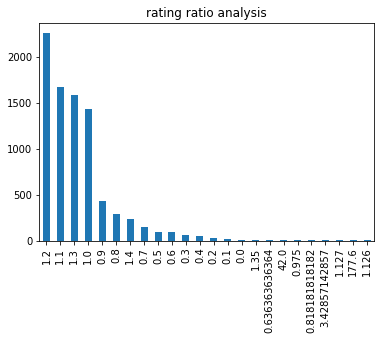

In [89]:
data['rating ratio'].value_counts().plot(kind='bar')
plt.title('rating ratio analysis')

This graph gives the insight of how rating ratio differs and which rating ratio is the highest 

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8445 entries, 0 to 8444
Data columns (total 25 columns):
tweet_id                 8445 non-null int64
in_reply_to_status_id    86 non-null float64
in_reply_to_user_id      86 non-null float64
timestamp                8445 non-null object
source                   8445 non-null object
text                     8445 non-null object
expanded_urls            8445 non-null object
rating_numerator         8445 non-null float64
rating_denominator       8445 non-null float64
name                     8445 non-null object
dog_type                 1504 non-null object
retweet_count            8445 non-null int64
favorite_count           8445 non-null int64
jpg_url                  8445 non-null object
img_num                  8445 non-null int64
p1                       8445 non-null object
p1_conf                  8445 non-null float64
p1_dog                   8445 non-null bool
p2                       8445 non-null object
p2_conf                 

In [91]:
data.dog_type.value_counts()

pupper     900
doggo      406
puppo      176
floofer    22 
Name: dog_type, dtype: int64

Text(0.5,1,'dog_type analysis')

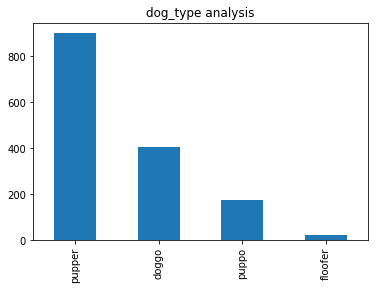

In [92]:
data['dog_type'].value_counts().plot(kind='bar')
plt.title('dog_type analysis')

**We observe through this graph pupper is more in number that is pupper is more common dog type **

In [98]:
#extracting month
data['timestamp']=pd.to_datetime(data['timestamp'])
data['month'] = data['timestamp'].dt.month


In [101]:
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating ratio,month
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3,8
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3,8
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3,8


In [102]:
#extracting year
data['year'] = data['timestamp'].dt.year

In [103]:
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating ratio,month,year
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,False,bagel,0.085851,False,banana,0.07611,False,1.3,8,2017
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,False,bagel,0.085851,False,banana,0.07611,False,1.3,8,2017
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,False,bagel,0.085851,False,banana,0.07611,False,1.3,8,2017


In [114]:
plotting_detail = pd.DataFrame(data.groupby('month')['retweet_count'].count())

In [115]:
plotting_detail

,retweet_count
month,
1,944
2,803
3,763
4,481
5,561
6,695
7,725
8,318
9,334


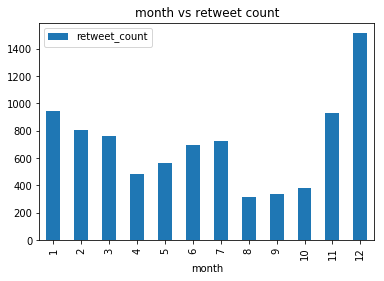

In [119]:
plotting_detail.plot(kind='bar',title='month vs retweet count')

we observed that in 12th month retweet count is maximum

In [138]:
plotting_detail1 = pd.DataFrame(data.groupby('year')['retweet_count'].count())

In [139]:
plotting_detail1

,retweet_count
year,
2015,1821
2016,4303
2017,2321


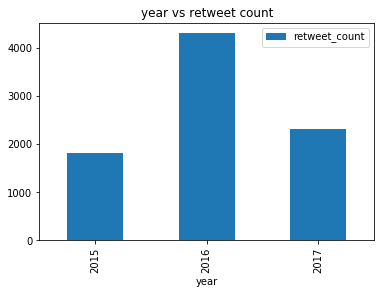

In [127]:
plotting_detail1.plot(kind='bar',title='year vs retweet count')

From above bar graph we noticed that 2016 year witnessed maximum retweet count

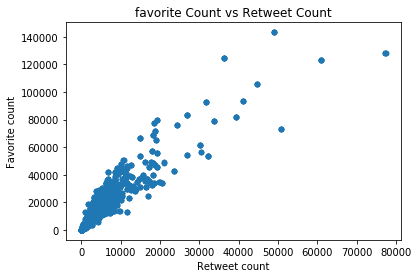

In [133]:
data.plot(x="retweet_count",y="favorite_count",kind="scatter")
plt.xlabel("Retweet count")
plt.ylabel("Favorite count")
plt.title("favorite Count vs Retweet Count")
plt.figure(figsize=(10,10))

above graph shows strong correlation between favorite tweets and retweets

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Distribution of rating ratio vs Dog Type')

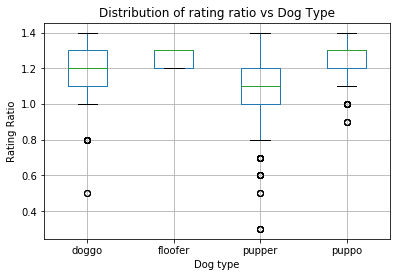

In [145]:
data.dog_type.value_counts()
data.boxplot(column='rating ratio', by='dog_type')
plt.xlabel("Dog type")
plt.ylabel("Rating Ratio")
plt.suptitle("")
plt.title("Distribution of rating ratio vs Dog Type")

puppo dog type has highest median rating ratio and pupper has the lowest median rating ratio